The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [67]:
# Imports
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [68]:
# Versões dos pacotes usados neste notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

matplotlib 3.1.3
numpy      1.18.1
imblearn   0.7.0
sklearn    0.23.2
pandas     1.0.1
seaborn    0.10.0
Data Science Academy


In [69]:
# Carregando os dados
df_original = pd.read_csv('dados/train.csv')
df_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descrição das variáveis

Variable =>	Definition	Key

survival =>	Survival	0 = No, 1 = Yes

pclass   =>	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex      =>	Sex	

Age      =>	Age in years

sibsp    =>	# of siblings / spouses aboard the Titanic	

parch    =>	# of parents / children aboard the Titanic	

ticket   =>	Ticket number	

fare     =>	Passenger fare	

cabin    =>	Cabin number
	
embarked =>	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [70]:
df_original.shape

(891, 12)

In [71]:
df_original.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
# Verificando valores missing
print(df_original.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [73]:
df_train_alterado = df_original[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

In [74]:
df_train_alterado.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [75]:
# Verificando Valores Únicos
df_train_alterado.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [76]:
# Cria uma cópia do dataset original
df = df_train_alterado.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [77]:
continuous

['Age', 'Fare']

In [78]:
# Variáveis contínuas
df[continuous].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [79]:
# Variáveis categóricas
df[categorical].head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


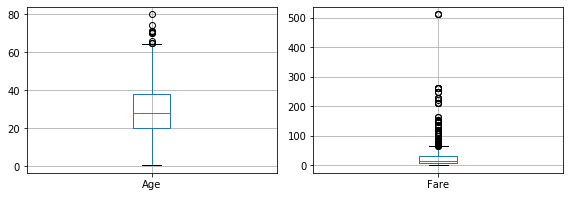

In [80]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
plt.savefig('imagens/boxplot1.png')

In [81]:
# Transformação de log nas variáveis contínuas
df[continuous] = np.log1p(1 + df[continuous])

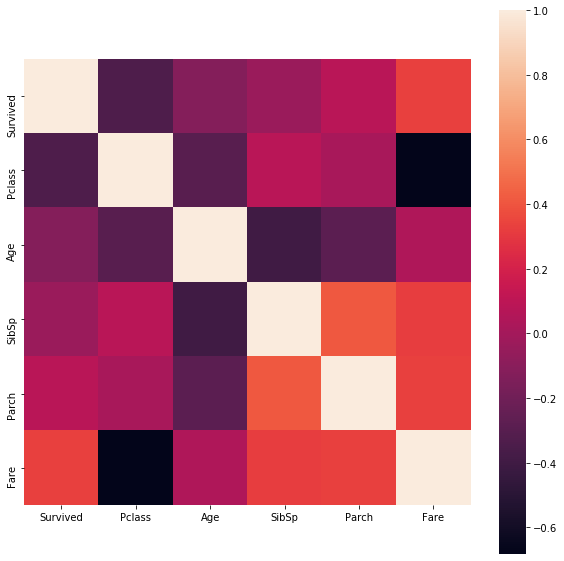

In [82]:
# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação 
sns.heatmap(df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].corr(), vmax = 1., square = True)

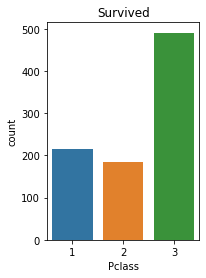

In [83]:
# Countplot Venda ou Não
plt.subplot(1,2,2)
plt.title("Survived")
sns.countplot(df['Pclass'])

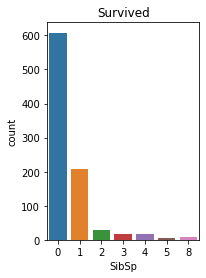

In [84]:
# Countplot Venda ou Não
plt.subplot(1,2,2)
plt.title("Survived")
sns.countplot(df['SibSp'])

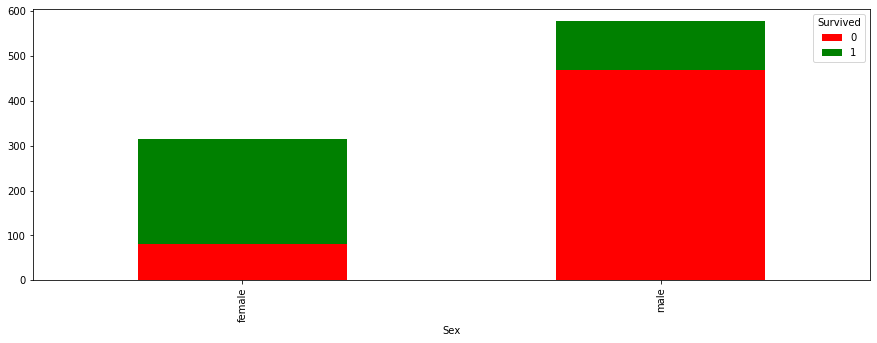

In [85]:
# Stacked Bar Tipo de Visitante x Revenue
pd.crosstab(df['Sex'], df['Survived']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (15, 5), 
                                                   color = ['red', 'green'])

## Pré Processamento

In [86]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,3.178054,1,0,2.224624,S
1,1,1,female,3.688879,1,0,4.294333,C
2,1,3,female,3.332205,0,0,2.295057,S
3,1,1,female,3.610918,1,0,4.009150,S
4,0,3,male,3.610918,0,0,2.307573,S


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [88]:
df["Embarked"] = df["Embarked"].astype(str)

In [89]:
# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])

# Remove valores missing eventualmente gerados
df.dropna(inplace = True)

In [90]:
df.shape

(714, 8)

In [91]:
# Verificando se a variável resposta está balanceada
target_count = df_original.Survived.value_counts()
target_count

0    549
1    342
Name: Survived, dtype: int64

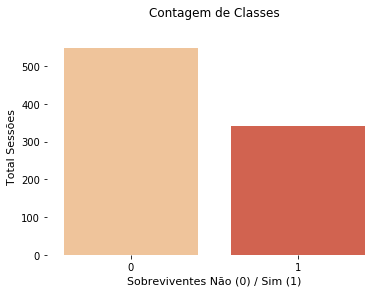

In [92]:
# Plot 
sns.countplot(df_original.Survived, palette = "OrRd")
plt.box(False)
plt.xlabel('Sobreviventes Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [93]:
# Instala e importa o pacote imblearn
!pip install -q imblearn
import imblearn

In [94]:
# Variáveis explicativas
df.iloc[:, 1:8].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.178054,1,0,2.224624,2
1,1,0,3.688879,1,0,4.294333,0
2,3,0,3.332205,0,0,2.295057,2
3,1,0,3.610918,1,0,4.009150,2
4,3,1,3.610918,0,0,2.307573,2


In [95]:
# Variável Target
df.iloc[:, 0].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [96]:
#Balanceamento de Classe - Oversampling

# Importa a função
from imblearn.over_sampling import SMOTE

# Separa X e y
X = df.iloc[:, 1:8]  
y = df.iloc[:, 0] 

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)


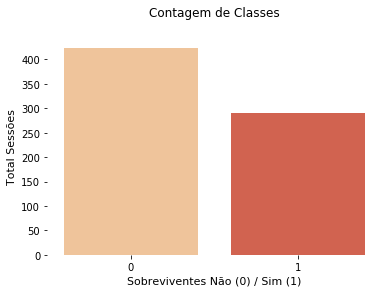

In [97]:
# Plot 
sns.countplot(df.Survived, palette = "OrRd")
plt.box(False)
plt.xlabel('Sobreviventes Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Sessões', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [98]:
df.shape

(714, 8)

In [99]:
X_res.shape

(848, 7)

In [100]:
y_res.shape

(848,)

In [101]:
# Ajustando X e y
X = X_res
y = y_res

In [102]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

## Modelo SVM

In [103]:
# Padronização
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

### Modelo Base com Kernel Linear

In [104]:
# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

In [105]:
# Cria o modelo
modelo_v1 = svm.SVC(kernel = 'linear')

# Grid Search
start = time.time()
modelo_v1_grid_search_linear = GridSearchCV(modelo_v1, param_grid, cv = 3)

# Treinamento
modelo_v1_grid_search_linear.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v1_grid_search_linear.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v1_grid_search_linear.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.1459951400756836
Acurácia em Treinamento: 77.40%

Hiperparâmetros Ideais: {'coef0': 0.5, 'degree': 2, 'gamma': 0.001}


In [106]:
# Previsões
previsoes_v1 = modelo_v1_grid_search_linear.predict(X_teste_scaled)

In [107]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acurácia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [108]:
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.6538461538461539,
 'Recall': 0.8673469387755102,
 'F1 Score': 0.7456140350877193,
 'Acurácia': 0.7725490196078432,
 'AUC': 0.7749230769230769}

### Modelo Base com Kernel RBF

In [109]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'rbf')

# Grid Search
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, param_grid, cv = 3)

# Treinamento
modelo_v2_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.20097017288208008
Acurácia em Treinamento: 77.40%

Hiperparâmetros Ideais: {'coef0': 0.5, 'degree': 2, 'gamma': 0.01}


In [110]:
# Previsões
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_teste_scaled)

# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [111]:
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.6538461538461539,
 'Recall': 0.8673469387755102,
 'F1 Score': 0.7456140350877193,
 'Acurácia': 0.7725490196078432,
 'AUC': 0.7749230769230769}

### Modelo Base com Kernel Polinomial

In [112]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'poly')


# Grid Search
start = time.time()
modelo_v3_grid_search_poly = GridSearchCV(modelo_v3, param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v3_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v3_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.13946914672851562
Acurácia em Treinamento: 78.75%

Hiperparâmetros Ideais: {'coef0': 0.5, 'degree': 4, 'gamma': 0.01}


In [113]:
# Previsões
previsoes_v3 = modelo_v3_grid_search_poly.predict(X_teste_scaled)

# Dicionário de métricas e metadados
SVM_dict_v3 = {'Modelo':'SVM',
               'Versão':'3',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acurácia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [114]:
print("Métricas em Teste:\n")
SVM_dict_v3

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '3',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.6538461538461539,
 'Recall': 0.8673469387755102,
 'F1 Score': 0.7456140350877193,
 'Acurácia': 0.7725490196078432,
 'AUC': 0.7749230769230769}

In [115]:
# Concatena todos os dicionários em um dataframe do Pandas
resumo = pd.DataFrame({'SVM_dict_v1':pd.Series(SVM_dict_v1),
                       'SVM_dict_v2':pd.Series(SVM_dict_v2),
                       'SVM_dict_v3':pd.Series(SVM_dict_v3)})

In [116]:
resumo

,SVM_dict_v1,SVM_dict_v2,SVM_dict_v3
Modelo,SVM,SVM,SVM
Versão,3,3,3
Kernel,Linear com Dados Padronizados,RBF com Dados Padronizados,Linear com Dados Padronizados
Precision,0.653846,0.653846,0.653846
Recall,0.867347,0.867347,0.867347
F1 Score,0.745614,0.745614,0.745614
Acurácia,0.772549,0.772549,0.772549
AUC,0.774923,0.774923,0.774923


# Fazendo Previsões com o Modelo Treinado

In [117]:
df_Previsoes = pd.read_csv("dados/test.csv")
df_Previsoes.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
# Verificando valores missing
print(df_Previsoes.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [119]:
print(df_Previsoes.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [120]:
media = df_Previsoes["Age"].median()
df_Previsoes["Age"].fillna(media, inplace=True)

media = df_Previsoes["Fare"].median()
df_Previsoes["Fare"].fillna(media, inplace=True)

print(df_Previsoes.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [121]:
df_Previsoes["Embarked"] = df_Previsoes["Embarked"].astype(str)

# Cria o encoder
lb = LabelEncoder()

# Aplica o encoder nas variáveis que estão com string
df_Previsoes['Sex'] = lb.fit_transform(df_Previsoes['Sex'])
df_Previsoes['Embarked'] = lb.fit_transform(df_Previsoes['Embarked'])


# Separa X e y
X = df_Previsoes[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

In [122]:
novo_x_scaled = StandardScaler().fit_transform(X)

In [123]:
# Previsão
previsao_X = modelo_v1_grid_search_linear.predict(novo_x_scaled)

In [124]:
previsao_X

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
df2 = pd.DataFrame(previsao_X)
df2.columns = ['Survived']
df_Previsoes = pd.concat([df_Previsoes, df2], axis=1)

In [126]:
df_Previsoes.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,1


In [127]:
dfRet = df_Previsoes[['PassengerId', 'Survived']]
dfRet

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [128]:
dfRet.to_csv('gender_submission.csv', index=False)